# Ensemble Techniques: Wine (Scikit-Learn)

## 1. Data Exploration

### 1.1 Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

### 1.2 Exploratory data analysis

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
df['target'] = wine['target']

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


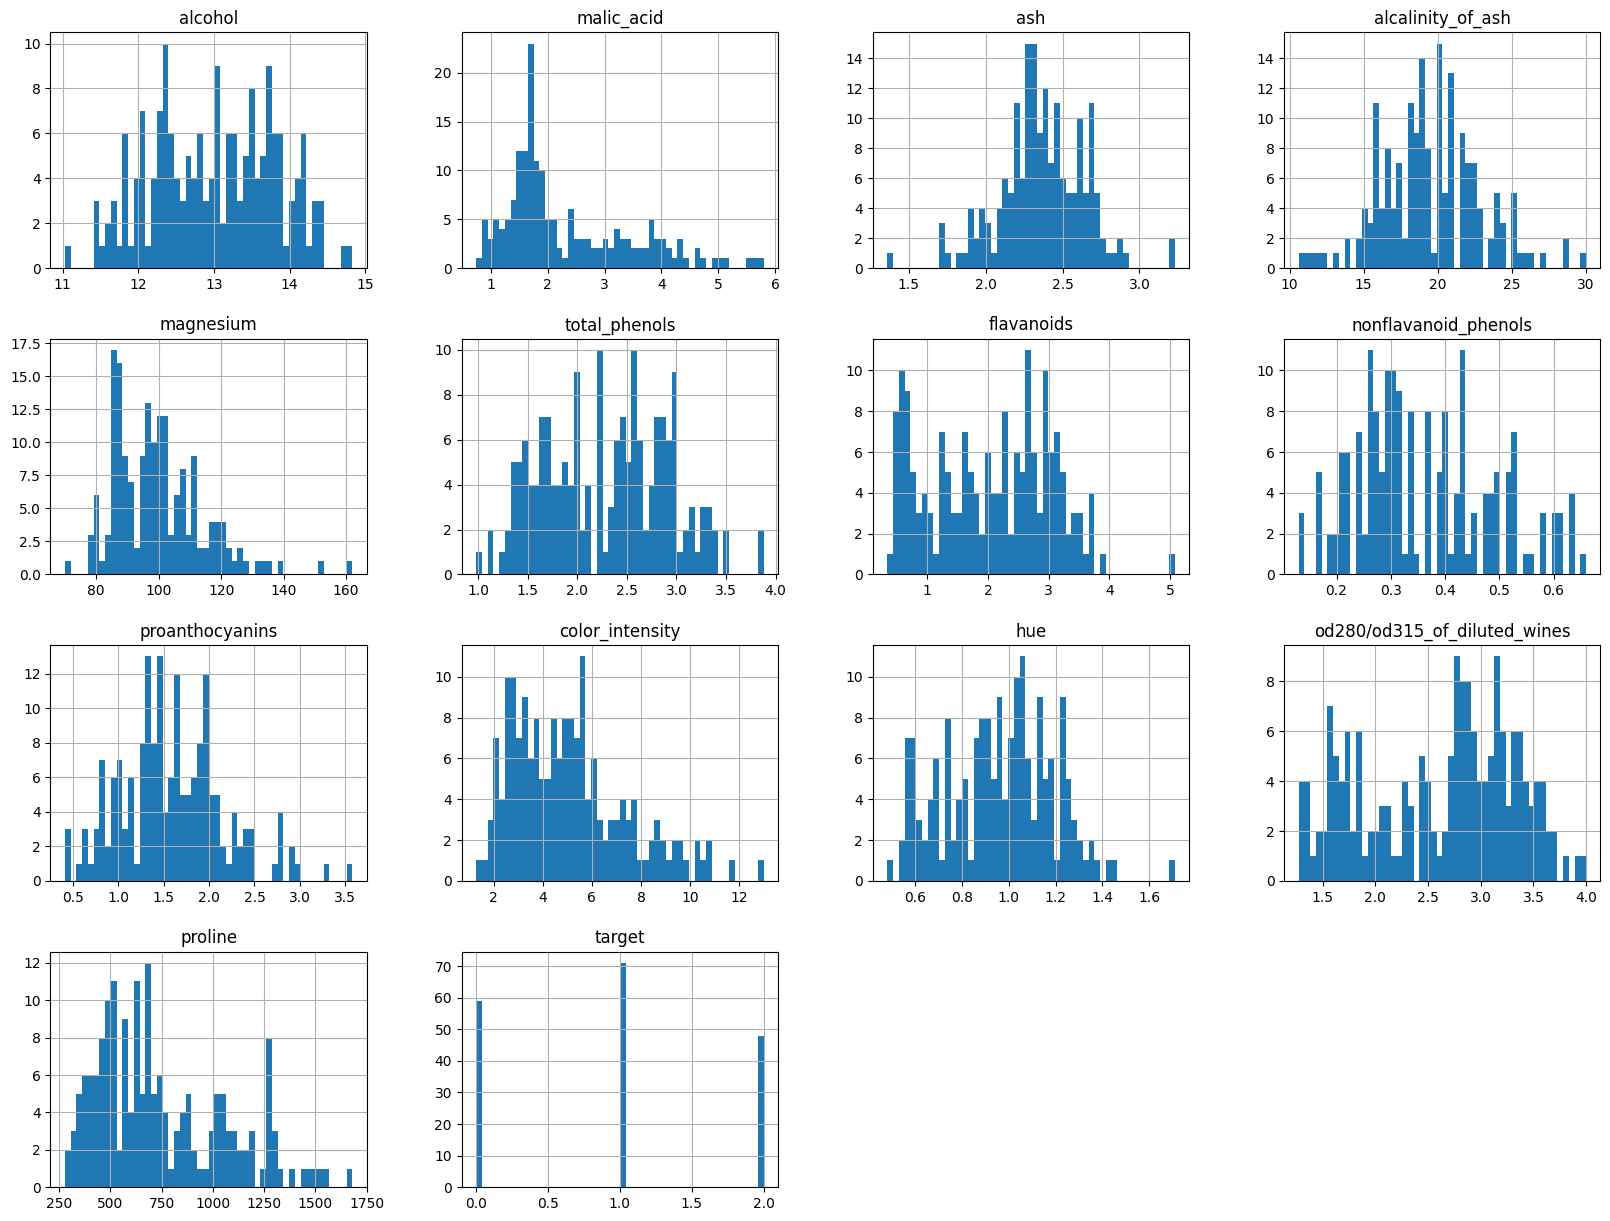

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.3 Features correlation

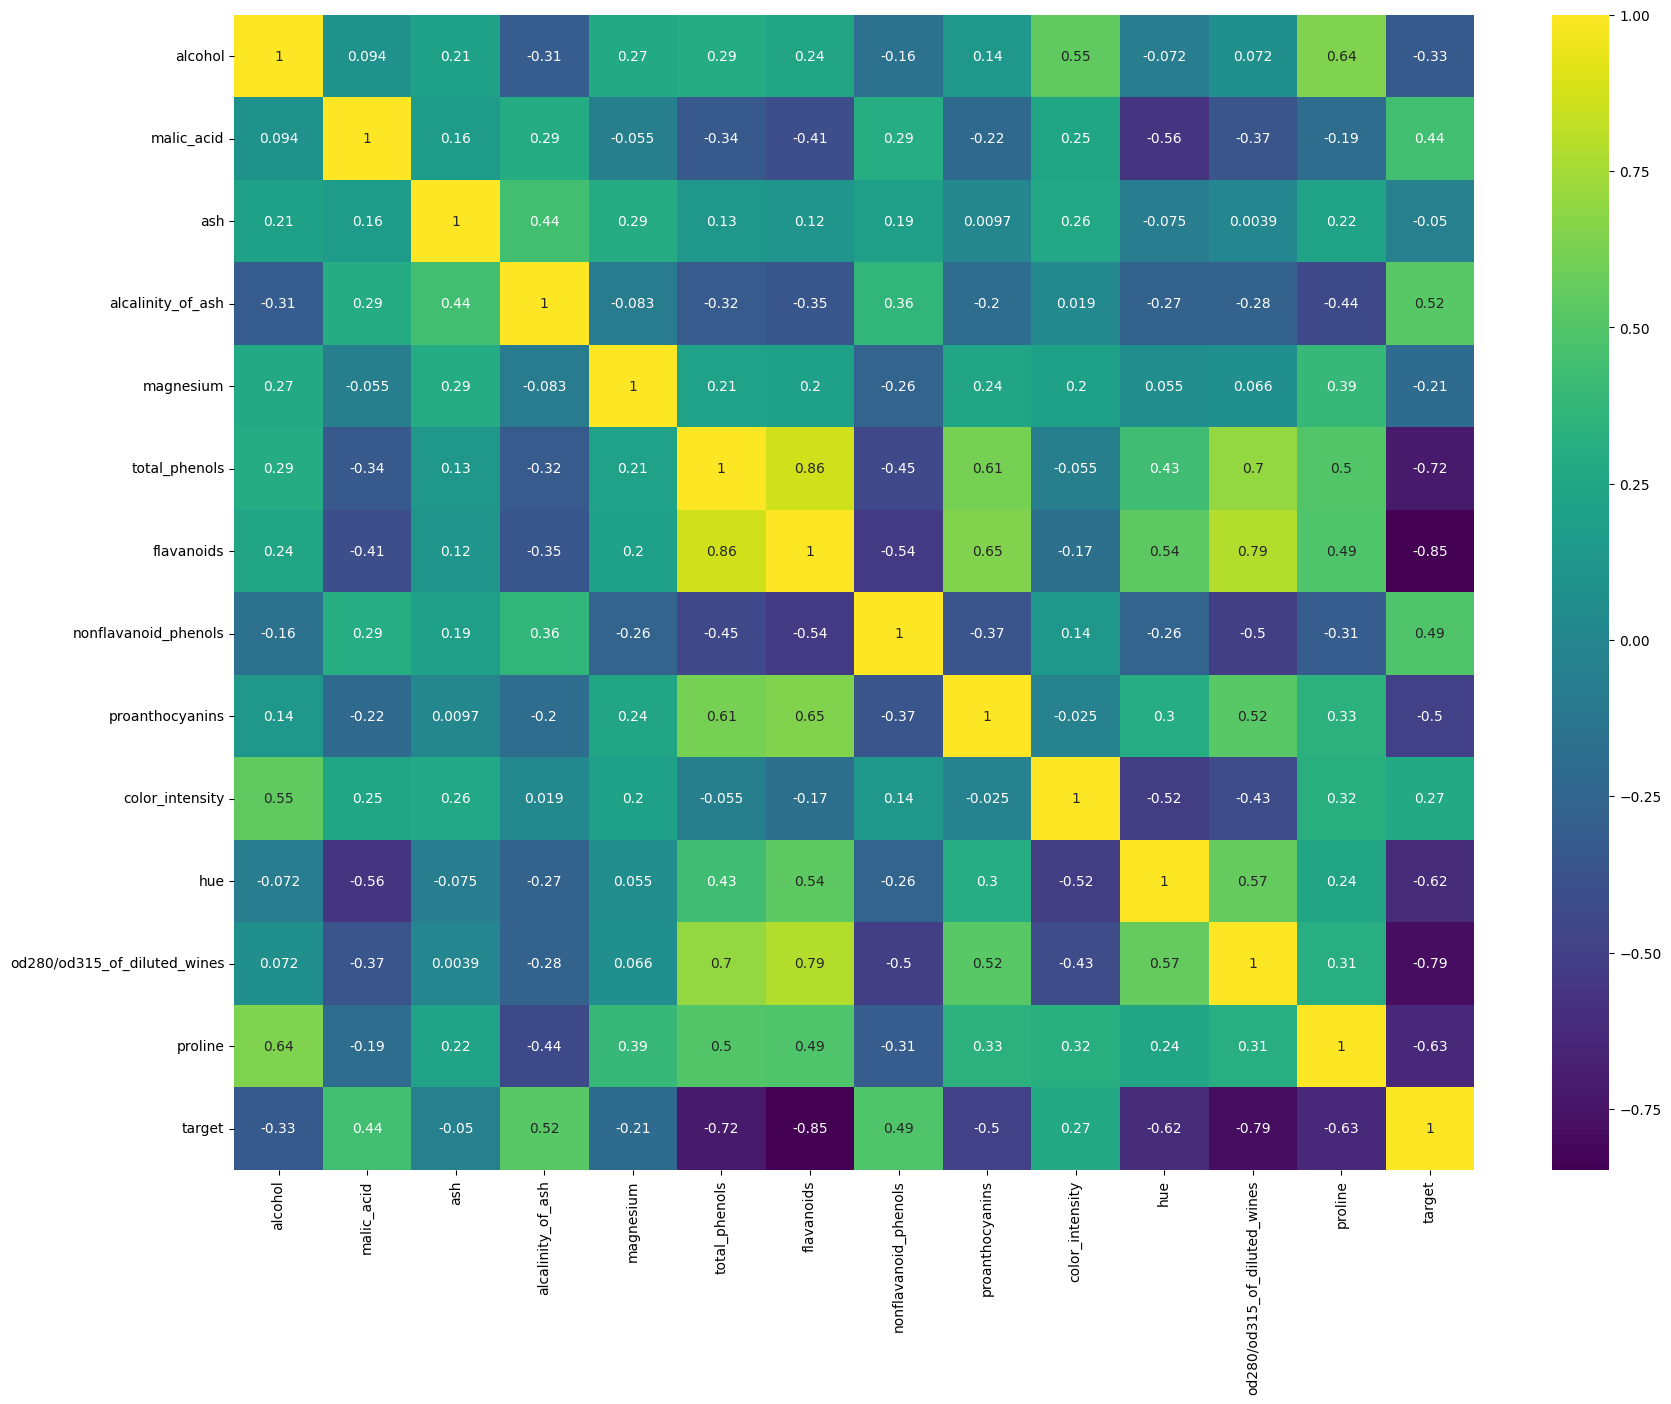

In [10]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

## 2. Data Preprocessing

### 2.1 Split features and target

In [11]:
X = df.drop('target', axis=1)
y = df['target']
X.shape, y.shape

((178, 13), (178,))

### 2.2 Split training and test datasets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### 2.3 Build pipeline

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def std_pipeline():
    return StandardScaler()

preprocessing = std_pipeline()

## 3. Model Training

### 3.1 Voting Classifier

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

hard_voting = make_pipeline(preprocessing, VotingClassifier(
    estimators=[('knn', knn), ('dt', dt), ('rf', rf)], 
    voting='hard'))

hard_voting.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('rf',
                                               RandomForestClassifier())]))])

In [15]:
soft_voting = make_pipeline(preprocessing, VotingClassifier(
    estimators=[('knn', knn), ('dt', dt), ('rf', rf)], 
    voting='soft'))

soft_voting.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('rf', RandomForestClassifier())],
                                  voting='soft'))])

### 3.2 Stacking Classifier

In [16]:
from sklearn.ensemble import StackingClassifier

stacking = make_pipeline(preprocessing, StackingClassifier(
    estimators=[('knn', knn), ('dt', dt), ('rf', rf)], 
    final_estimator=rf, 
    cv=5))

stacking.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(cv=5,
                                    estimators=[('knn', KNeighborsClassifier()),
                                                ('dt',
                                                 DecisionTreeClassifier()),
                                                ('rf',
                                                 RandomForestClassifier())],
                                    final_estimator=RandomForestClassifier()))])

## 4. Model Evaluation

### 4.1 Voting Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



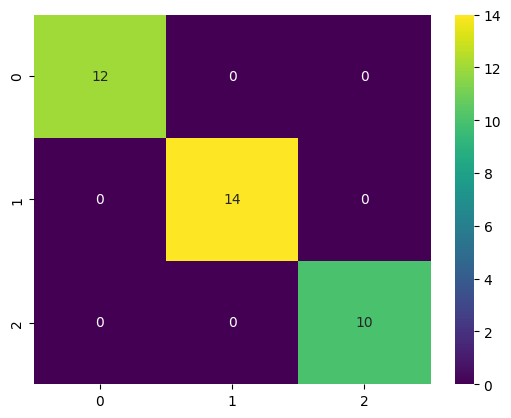

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')

evaluate_model(hard_voting)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



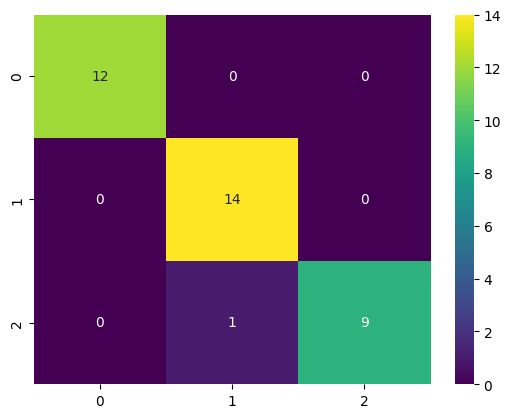

In [18]:
evaluate_model(soft_voting)

### Stacking Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



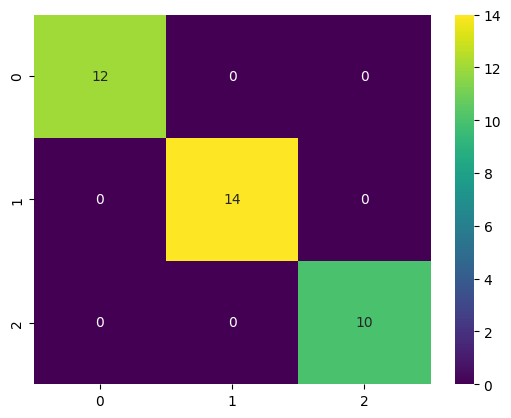

In [19]:
evaluate_model(stacking)

1. Voting Classifier:
- Both hard voting and soft voting achieved perfect precision, recall, and F1-score for all classes, resulting in 100% accuracy.
- It means that all three individual classifiers unanimously agreed on the correct class for each sample.

2. Stacking Classifier:
- Also achieved high accuracy (97%).